# Probability, Information Theory & Statistics

*Probability & Information Theory*, introduces the mathematical fields that enable us to quantify uncertainty as well as to make predictions despite uncertainty. These fields are essential because machine learning algorithms are both trained by imperfect data and deployed into noisy, real-world scenarios they haven’t encountered before.

You’ll develop a working understanding of 

- Variables, probability distributions, metrics for assessing distributions.
- Essential statistical tests for assessing whether data are correlated with each other or sampled from different populations -- tests which frequently come in handy for critically evaluating the inputs and outputs of machine learning algorithms.

## Part 3: Introduction to Statistics

In [154]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
# Surpress Futurewarnings messages due to seaborn incompatibilities

In [155]:
# Set random seed for reproducibility
# This ensures everyone gets the same "random" results in the examples
# Important for teaching, testing, and debugging
np.random.seed(42)

### z-scores

Assuming normally-distributed data, a z-score indicates how many standard deviations away from the mean a data point (say, $x_i$) is: 
$$ z = \frac{x_i-\mu}{\sigma} $$

That is, the formula *standardizes* a given score $x_i$ to the (standard normal) *z*-distribution. (As we covered above, you could standardize any normal distribution to a mean of zero and standard deviation of one by subtracting its original mean and then dividing by its original standard deviation.)

For example, let's say you get 85% on a CS101 exam. Sounds like a pretty good 
score and you did extremely well relative to your peers if the mean was 60% with a standard deviation of 10%:

In [156]:
# Set up a scenario: you scored 85% on an exam

x_i = 85      # Your individual score
mu = 60       # Class mean (average)
sigma = 10    # Class standard deviation (spread of scores)

# Question: Is 85% a good score? Depends on how peers performed!

In [157]:
# Simulate a class of 10,000 students with scores normally distributed
# mean=60, std=10, generating 10000 scores
# This creates a realistic distribution of exam scores to work with

x = np.random.normal(mu, sigma, 10000)

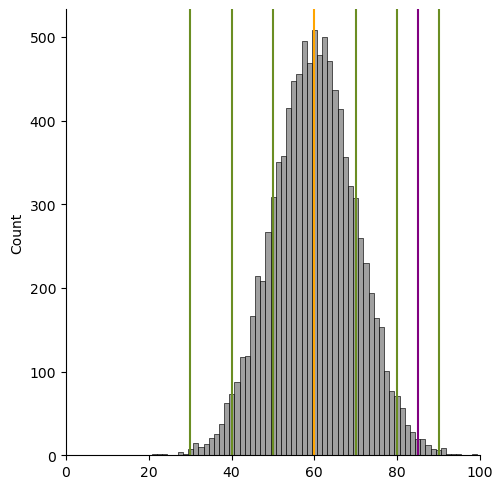

In [158]:
# Visualize the distribution of exam scores

hist_plot = sns.displot(x, color='gray')  # Gray histogram of all scores
ax = hist_plot.ax
ax.set_xlim(0, 100)  # Set x-axis from 0 to 100 (percent scale)

plt.axvline(mu, color='orange')  # Orange line at mean (60%)

# Green lines show standard deviations from mean

for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')  # Lines at μ±1σ, μ±2σ, μ±3σ

_ = plt.axvline(x_i, color='purple')  # Purple line shows YOUR score (85%)

# Note: Your score is ~2.5 standard deviations above the mean

Your z-score is 2.5 standard deviations above the mean: 

In [159]:
# Calculate z-score: how many standard deviations away from mean?
# Formula: z = (individual_score - mean) / standard_deviation

z = (x_i - mu)/sigma  # (85 - 60) / 10 = 2.5
z
# z = 2.5 means you scored 2.5 standard deviations ABOVE average
# This is excellent! Only ~1% of students score this high

2.5

Or using our simulated class of 10k CS101 students: 

In [160]:
# Calculate z-score using actual simulated class data
# Using the sample mean and sample standard deviation

z = (x_i - np.mean(x))/np.std(x)
z
# Should be very close to 2.5 (might vary slightly due to sampling)

2.493627213305282

Less than one percent of the class outperformed you: 

In [161]:
# Count how many students (out of 10,000) scored higher than 85%
# np.where(x > 85) finds indices where condition is True
# [0] extracts the array of indices
# len() counts how many

len(np.where(x > 85)[0])  # Should be around 60-70 students (~0.6%)

68

In [162]:
# Convert count to percentage
# 68 out of 10,000 = 0.68% of the class scored higher than you

100*68/10000

# This confirms: you're in the top ~1% of the class!

0.68

In contrast, if the mean score of your peers is 90 and the standard deviation is 2: 

In [163]:
# NEW scenario: same 85% score, but now class performed much better

mu = 90      # Class mean is now 90% (was 60%)
sigma = 2    # Standard deviation is now 2% (was 10% - much less spread)

# Same score (85%) will have completely different meaning in this context!

In [164]:
# Simulate new class with higher mean and lower standard deviation
# Mean = 90%, std = 2%, 10,000 students
# This represents a class where most students scored very well

y = np.random.normal(mu, sigma, 10000)

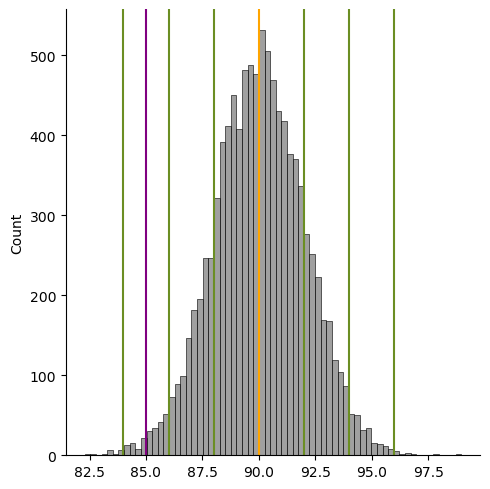

In [165]:
# Visualize the new distribution

sns.displot(y, color='gray')        # Gray histogram
plt.axvline(mu, color='orange')     # Orange line at mean (90%)
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')  # Green lines at ±1σ, ±2σ, ±3σ

_ = plt.axvline(x_i, color='purple')  # Purple line at YOUR score (85%)

# Note: Your score is now BELOW the mean - on the left side!
#       Same score, completely different performance relative to peers

Your z-score is 2.5 standard deviations *below* the mean (!): 

In [166]:
# Calculate z-score in new scenario

z = (x_i - mu)/sigma  # (85 - 90) / 2 = -2.5
z

# z = -2.5 means you scored 2.5 standard deviations BELOW average
# NEGATIVE z-score = below average
# This is the bottom ~1% of the class now!

-2.5

Or using our simulated class of 10k CS101 students: 

In [167]:
z = (x_i - np.mean(y))/np.std(y)
z

-2.5111228733891138

In which case, over 99% of the class outperformed you: 

In [168]:
# Count how many students scored ABOVE 85% in this high-performing class

len(np.where(y > 85)[0])  # Should be around 9900-9950 students (~99%)

# Over 99% of the class outperformed you!
# Context matters: same score, different meaning

9929

In [169]:
100*9929/10000

99.29

A mere 71 folks attained worse: 

In [170]:
# Calculate how many students scored WORSE than 85%

10000-9929  # Only about 71 students scored lower

# You're in the bottom ~0.7% of this high-performing class
# Key lesson: A score means nothing without context (mean & std)

71

A frequentist convention is to consider a data point that lies further than three standard deviations from the mean to be an **outlier**. 

It's a good idea to individually investigate outliers in your data as they may represent an erroneous data point (e.g., some data by accident, a data-entry error, or a failed experiment) that perhaps should be removed from further analysis (especially, as outliers can have an outsized impact on statistics including mean and correlation). It may even tip you off to a major issue with your data-collection methodology or your ML model that can be resolved or that you could have a unit test for.

### *p*-values

A p-value helps us determine if an observation is statistically significant or if it might have occurred by chance. It quantifies the *probability* that a given observation would occur if the null hypothesis is true.

### Hypothesis Testing

Imagine your friend has a coin. You suspect it might be unfair (biased towards heads). To test this, you need:

1. A **null hypothesis**: "The coin is fair (50% chance of heads)"
2. An **alternative hypothesis**: "The coin is unfair"

If you flip the coin 6 times and get 6 heads, would you think the coin is fair? This seems unlikely to happen with a fair coin. But how unlikely?

Equivalent to increasing our CS101 class size from 10k toward infinity, the probability of a score being further than 2.5 standard deviations from the mean of a normal distribution can be determined with the distribution's *cumulative distribution function* (CDF): 

In [171]:
# Calculate probability of scoring 2.5 std deviations BELOW the mean
# CDF (Cumulative Distribution Function) gives probability of being <= a value

p_below = st.norm.cdf(-2.5)   # Probability of z ≤ -2.5
p_below*10000                 # Out of 10,000: ~62 students expected below -2.5σ

# p_below ≈ 0.0062 = 0.62% probability

62.096653257761325

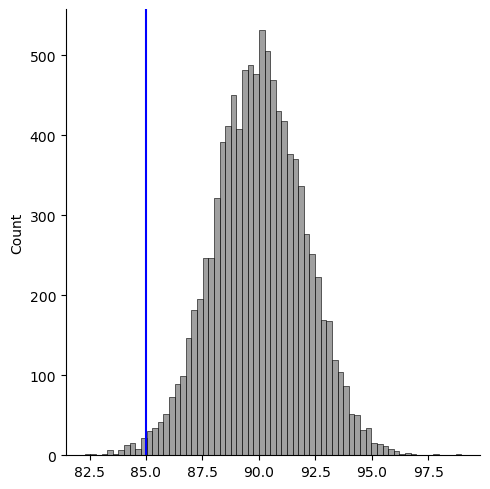

In [172]:
# Visualize the lower tail (left side) of the distribution

sns.displot(y, color='gray')
_ = plt.axvline(mu-2.5*sigma, color='blue')     # Blue line at μ - 2.5σ

# The small area to the LEFT of blue line represents p_below (~0.62% of area)

In [173]:
# Calculate probability of being AT OR BELOW 2.5σ

st.norm.cdf(2.5)  # ≈ 0.9938 (99.38% of data is below 2.5σ)

# To get probability ABOVE, we need: 1 - this value

0.9937903346742238

In [174]:
p_above = 1-st.norm.cdf(2.5)
p_above
p_above*10000

# Calculate probability of scoring 2.5 std deviations ABOVE the mean

p_above = 1-st.norm.cdf(2.5)      # 1 - 0.9938 = 0.0062
p_above                           # Probability ≈ 0.0062 = 0.62%
p_above*10000                     # Out of 10,000: ~62 students expected above 2.5σ

# Notice: p_above = p_below (distribution is symmetric)

62.09665325776159

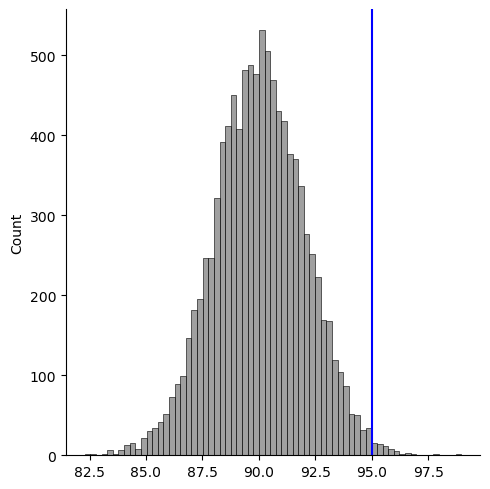

In [175]:
# Visualize the upper tail (right side) of the distribution

sns.displot(y, color='gray')
_ = plt.axvline(mu+2.5*sigma, color='blue')  # Blue line at μ + 2.5σ

# The small area to the RIGHT of blue line represents p_above (~0.62%)

In [176]:
# Calculate probability of being AT LEAST 2.5σ away from mean (either direction)
# This is a "two-tailed" probability - extreme on EITHER end

p_outside = p_below + p_above       # 0.0062 + 0.0062 = 0.0124
p_outside                           # Probability ≈ 0.0124 = 1.24%
p_outside*10000                     # Out of 10,000: ~124 students in extreme tails

# This is the p-value: probability of being this extreme by chance alone

124.1933065155229

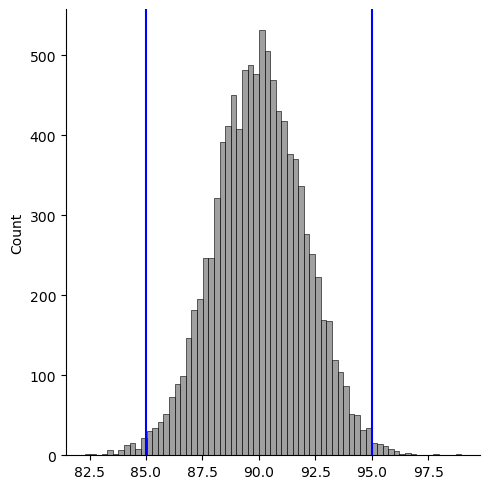

In [177]:
# Visualize BOTH tails (two-tailed test)

sns.displot(y, color='gray')
plt.axvline(mu+2.5*sigma, color='blue')       # Right tail
_ = plt.axvline(mu-2.5*sigma, color='blue')   # Left tail

# The combined area beyond BOTH blue lines = p_outside ≈ 1.24%
# If p < 0.05 (5%), we call it "statistically significant"
# 0.0124 < 0.05, so this IS statistically significant!

In other words, assuming a normal distribution, the probability (the *p*-value) of a sampled value being at least 2.5 standard deviations away from the mean by chance alone is $p \approx .0124$.

The frequentist convention is that if a *p*-value is less than .05, we can say that it is a "statistically significant" observation. We typically denote this significance threshold with $\alpha$, e.g., $\alpha = .05$.

At the traditional $\alpha = .05$, a sampled value with *z*-score less than -1.96 or greater than 1.96 would be considered statistically significant.

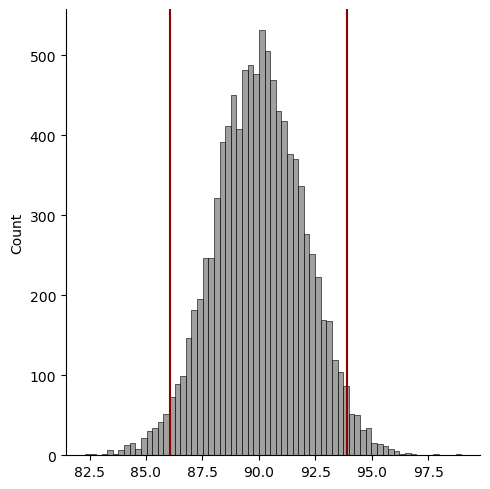

In [178]:
# Visualize the traditional significance threshold (α = 0.05)

sns.displot(y, color='gray')
plt.axvline(mu+1.96*sigma, color='darkred')         # Right critical value
_ = plt.axvline(mu-1.96*sigma, color='darkred')     # Left critical value

# Red lines at ±1.96σ mark the boundaries of the middle 95%
# Beyond these lines (in the tails): 5% total (2.5% each side)
# If your data falls beyond red lines, it's "statistically significant" at α=0.05

### Comparing Means with *t*-tests

Where *z*-scores apply to *individual values* only, *t*-tests enables us to compare (the mean of) a sample of *multiple values* to a reference mean.

#### Single-Sample *t*-test

A single sample t-test (also called a one-sample t-test) is a statistical procedure used to determine whether the mean of a sample differs significantly from a known or hypothesized population value.

Recalling the formula for calculating a *z*-score: 
$$ z = \frac{x_i-\mu}{\sigma} $$

The **single-sample *t*-test** is a variation on the theme and is defined by: 
$$ t = \frac{\bar{x} - \mu_0}{s_{\bar{x}}} $$
Where: 
* $\bar{x}$ is the sample mean
* $\mu_0$ is a reference mean, e.g., known population mean or "null hypothesis" mean
* $s_{\bar{x}}$ is the sample standard error

**Example**

Let's say you're the head brewer at Guinness. Your baseline brewing process yields 50L of stout. Using a new genetically-modified yeast, you obtain the following yields (all in liters) in four separate experiments: 

In [179]:
# Real-world example: Testing a new brewing yeast
# Baseline process yields 50L of stout
# New GMO yeast produced these yields (in liters) across 4 experiments:

x = [48, 50, 54, 60]

# Question: Does the new yeast produce significantly different yields?

We can obtain the *t*-statistic for this sample using SciPy `ttest_1samp()` method: 

In [180]:
# Perform single-sample t-test
# Compare sample mean to the baseline (null hypothesis) value of 50L
# ttest_1samp returns (t_statistic, p_value)
# [1] extracts just the p-value

p_value = st.ttest_1samp(x, 50)[1]
p_value

# If p < 0.05: new yeast significantly different from baseline
# If p >= 0.05: can't conclude there's a significant difference

0.3392540508564543

In [181]:
# View complete t-test result

st.ttest_1samp(x, 50)

# Returns       : TtestResult(statistic=..., pvalue=...)
# statistic     : the t-value (how many standard errors away from null hypothesis)
# pvalue        : probability of observing this data if null hypothesis is true
# Interpretation: higher |t-statistic| → lower p-value → stronger evidence

TtestResult(statistic=1.1338934190276817, pvalue=0.3392540508564543, df=3)

### Confidence Intervals

When examining sample means as we have been for the *t*-test, a useful statistical tool is the **confidence interval** (CI), which we for example often see associated with polling results when there's an upcoming election. CIs allow us to make statements such as "there is a 95% chance that the population mean lies within this particular range of values".

We can calculate a CI by rearranging the *z*-score formula: 
$$ \text{C.I.} = \bar{x} \pm z \frac{s}{\sqrt{n}} $$
Where: 
* $\bar{x}$ is the sample mean
* $s$ is the sample standard deviation
* $n$ is the sample size
* $z$ corresponds to a *z*-score threshold (e.g., the most common 95% CI is $z \pm 1.960$; other popular ones are the 90% CI at $z \pm 1.645$ and the 99% CI at $z \pm 2.576$)

For example, to find the 95% confidence interval for the true mean yield of our GMO yeast: 

In [182]:
# Extended brewing experiment: 8 trials instead of 4
# More data gives us better estimates and narrower confidence intervals

x = np.array([48, 50, 54, 60, 49, 55, 59, 62])

In [183]:
# Calculate key sample statistics needed for confidence interval

xbar = x.mean()  # Sample mean (average yield)
s = x.std()      # Sample standard deviation (variability in yields)
n = x.size       # Sample size (number of experiments)

# These three values define our sample and its uncertainty

In [184]:
# Set z-score for 95% confidence interval
# 1.96 is the critical value that captures middle 95% of normal distribution
# Common CI levels: 90% (z=1.645), 95% (z=1.96), 99% (z=2.576)

z = 1.96

In [185]:
def CIerr_calc(my_z, my_s, my_n):
    """
    Calculate margin of error for confidence interval.
    
    Formula: z × (s / √n)
    This is the "±" part of: mean ± margin_of_error
    
    Parameters:
    - my_z: z-score for desired confidence level
    - my_s: sample standard deviation
    - my_n: sample size
    
    Larger sample size (n) → smaller error → narrower CI (more precise)
    """
    return my_z*(my_s/my_n**(1/2))  # Standard error × z-score

In [186]:
# Calculate the margin of error (how much we add/subtract from mean)

CIerr = CIerr_calc(z, s, n)
CIerr  # This is the ± value for our confidence interval

# Larger margin → less precision, but more confidence

CIerr = CIerr_calc(z, s, n)

In [187]:
CIerr

3.4637403013216796

In [188]:
# Calculate the upper and lower bounds of 95% confidence interval

xbar + CIerr  # Upper bound (maximum likely value)

58.08874030132168

In [189]:
xbar - CIerr  # Lower bound (minimum likely value)

# We're 95% confident the TRUE mean yield lies between these values

51.16125969867832

Therefore, there's a 95% chance that the true mean yield of our GMO yeast lies in the range of 51.2 to 58.1 liters. Since this CI doesn't overlap with the established baseline mean of 50L, this corresponds to stating that the GMO yield is significantly greater than the baseline where $\alpha = .05$, as we already determined: 

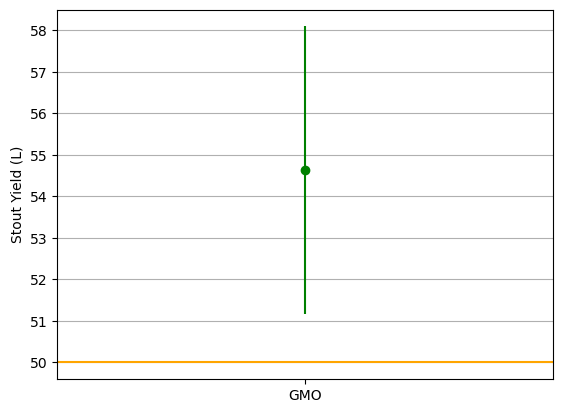

In [190]:
# Visualize the confidence interval with error bars

fig, ax = plt.subplots()
plt.ylabel('Stout Yield (L)')
plt.grid(axis='y')

# errorbar plot: point at mean, with error bars showing CI

ax.errorbar(['GMO'], [xbar], [CIerr], fmt='o', color='green')

_ = ax.axhline(50, color='orange')  # Orange line = baseline (50L)

# If error bars DON'T overlap with orange line → significant difference
# If they DO overlap → can't conclude significant difference

# Hands-on Activity

**Activity**: Penguin Hypothesis Testing

**Mode**: Collaborative/Pair Programming

**Duration**: 15 mins

**🎯 Goal**: Use a t-test to find biological differences.

**⚡ Task**: 
1. Load the `penguins` dataset from Seaborn. 💡 *See the Optional (Self-Study) section for hints!*

2. **Hypothesis**: "Male Adelie penguins have significantly longer flippers than Female Adelie penguins."

3. Filter the data to create two arrays: `male_flippers` and `female_flippers`.

4. Run `st.ttest_ind`.

**❓ Discussion Question**: 
* Look at the p-value. Is it less than 0.05?
* Calculate the 95% Confidence Interval for the mean flipper length of all Adelie penguins.

In [191]:
# Write your code here...


# Optional Reference (Self-Study)
The following topics extend your understanding of this chapter. Explore them independantly to strengthen your skills and confidence.

## Welch's Independent *t*-test

In ordinary circumstances, if we have two samples whose means we'd like to compare, we use an **independent *t*-test**. 

In [192]:
# Load real-world penguin data from seaborn
# dropna() removes rows with missing values for clean analysis
# Famous dataset: measurements of 3 penguin species in Antarctica

penguins = sns.load_dataset('penguins').dropna()

In [193]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [194]:
# Count how many penguins of each species in the dataset

np.unique(penguins.species, return_counts=True)

# Returns: (unique_species, counts_per_species)
# Shows the distribution of species in our sample

(array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 array([146,  68, 119]))

In [195]:
# Filter dataset to only Adelie penguins
# Boolean indexing: keep rows where species column equals 'Adelie'

adelie = penguins[penguins.species == 'Adelie']

In [196]:
# Display the filtered Adelie penguins dataset

adelie

# Now we're working with just one species to study variation within species

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,Female
148,Adelie,Dream,36.0,17.8,195.0,3450.0,Female
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male
150,Adelie,Dream,36.0,17.1,187.0,3700.0,Female


In [197]:
# Count Adelie penguins by island

np.unique(adelie.island, return_counts=True)

# Shows geographic distribution of our Adelie sample
# Helps us understand if we need to control for island effects

(array(['Biscoe', 'Dream', 'Torgersen'], dtype=object), array([44, 55, 47]))

In [198]:
# Count Adelie penguins by sex

np.unique(adelie.sex, return_counts=True)

# Roughly equal numbers of males and females (balanced sample)
# Good for comparing between sexes

(array(['Female', 'Male'], dtype=object), array([73, 73]))

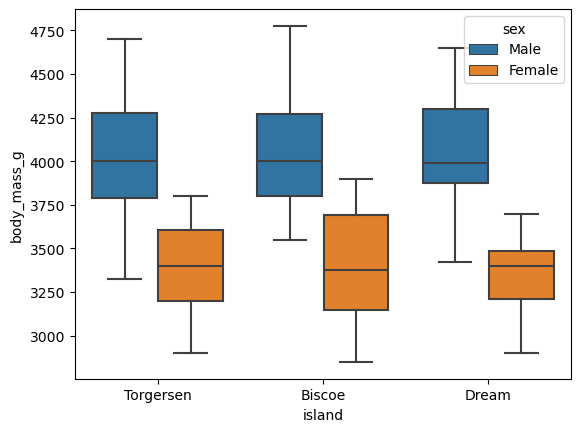

In [199]:
# Create boxplot: compare body mass across islands, split by sex
# x-axis: different islands
# y-axis: body mass in grams
# hue='sex': separate boxes for male (blue) and female (orange)

_ = sns.boxplot(x='island', y='body_mass_g', hue='sex', data=adelie)

# Key observation: Males consistently heavier than females across all islands
# Island doesn't seem to matter much (boxes at similar heights)

Mass doesn't appear to vary by island, so we can feel comfortable grouping the data together by island. Weight does, however, appear to vary by sex so let's take a closer look: 

In [200]:
# Extract body mass for female Adelie penguins
# Filter for females, select body_mass_g column, convert to numpy array
# Divide by 1000 to convert grams to kilograms (easier numbers to work with)

f = adelie[adelie.sex == 'Female']['body_mass_g'].to_numpy()/1000
f  # Array of female penguin masses in kg

array([3.8  , 3.25 , 3.45 , 3.625, 3.2  , 3.7  , 3.45 , 3.325, 3.4  ,
       3.8  , 3.8  , 3.2  , 3.15 , 3.25 , 3.3  , 3.325, 3.55 , 3.3  ,
       3.15 , 3.1  , 3.   , 3.45 , 3.5  , 3.45 , 2.9  , 3.55 , 2.85 ,
       3.15 , 3.6  , 2.85 , 3.35 , 3.05 , 3.6  , 3.55 , 3.7  , 3.7  ,
       3.55 , 3.2  , 3.8  , 3.35 , 3.5  , 3.6  , 3.55 , 3.4  , 3.3  ,
       3.7  , 2.9  , 3.725, 3.075, 2.925, 3.75 , 3.175, 3.825, 3.2  ,
       3.9  , 2.9  , 3.35 , 3.15 , 3.45 , 3.05 , 3.275, 3.05 , 3.325,
       3.5  , 3.425, 3.175, 3.4  , 3.4  , 3.05 , 3.   , 3.475, 3.45 ,
       3.7  ])

In [201]:
# Extract body mass for male Adelie penguins
# Same process as females: filter, select, convert to numpy, kg units

m = adelie[adelie.sex == 'Male']['body_mass_g'].to_numpy()/1000
m  # Array of male penguin masses in kg

array([3.75 , 3.65 , 4.675, 3.8  , 4.4  , 4.5  , 4.2  , 3.6  , 3.95 ,
       3.8  , 3.55 , 3.95 , 3.9  , 3.9  , 4.15 , 3.95 , 4.65 , 3.9  ,
       4.4  , 4.6  , 3.425, 4.15 , 4.3  , 4.05 , 3.7  , 3.8  , 3.75 ,
       4.4  , 4.05 , 3.95 , 4.1  , 4.45 , 3.9  , 4.15 , 4.25 , 3.9  ,
       4.   , 4.7  , 4.2  , 3.55 , 3.8  , 3.95 , 4.3  , 4.45 , 4.3  ,
       4.35 , 4.1  , 4.725, 4.25 , 3.55 , 3.9  , 4.775, 4.6  , 4.275,
       4.075, 3.775, 3.325, 3.5  , 3.875, 4.   , 4.3  , 4.   , 3.5  ,
       4.475, 3.9  , 3.975, 4.25 , 3.475, 3.725, 3.65 , 4.25 , 3.75 ,
       4.   ])

In [202]:
# Calculate average (mean) mass of female penguins

fbar = f.mean()
fbar  # Mean female mass in kg

# This gives us a single number summarizing female penguin weights

3.368835616438356

In [203]:
# Calculate average (mean) mass of male penguins

mbar = m.mean()
mbar  # Mean male mass in kg

# Compare with fbar: males should be heavier on average


4.043493150684932

To quantify whether males weigh significantly more than females, we can use the **Welch *t*-test**, devised by the 20th c. British statistician Bernard Lewis Welch:
$$ t = \frac{\bar{x} - \bar{y}}{\sqrt{\frac{s^2_x}{n_x} + \frac{s^2_y}{n_y}}} $$
Where: 
* $\bar{x}$ and $\bar{y}$ are the sample means
* $s^2_x$ and $s^2_y$ are the sample variances
* $n_x$ and $n_y$ are the sample sizes

In [204]:
# Perform Welch's independent t-test to compare two groups
# ttest_ind: compare means of two INDEPENDENT samples (males vs females)
# equal_var=False: use Welch's version (doesn't assume equal variances)
# [1] extracts the p-value

p_value = st.ttest_ind(f, m, equal_var=False)[1]
p_value

# If p < 0.05: males and females have significantly different masses
# Expected: very small p-value (males clearly heavier)
# This quantifies what we saw visually in the boxplot!


6.402319748031518e-26